In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [21]:
# set the location of the dataset
%env DATASET=/home/nadir/codes/python-data-visualization/coffee_shop.csv

env: DATASET=/home/nadir/codes/python-data-visualization/coffee_shop.csv


In [22]:
dataset = os.environ["DATASET"]

df = pd.read_csv(f"{dataset}")
df.set_index("transaction_id")
df

,transaction_id,transaction_date,customer_name,transaction_amount,menu,customer_rating
0,1,2023-11-01,Alice Smith,3.50,espresso,5
1,2,2023-11-01,John Doe,3.50,espresso,4
2,3,2023-11-01,Emily Johnson,4.25,macchiato,4
3,4,2023-11-02,Michael Brown,3.00,green tea,3
4,5,2023-11-02,Sarah Wilson,2.50,jasmine tea,4
5,6,2023-11-02,David Davis,4.75,cappuccino,5
6,7,2023-11-03,Olivia Smith,4.75,cappuccino,4
7,8,2023-11-03,James Johnson,4.75,cappuccino,4
8,9,2023-11-03,Emma Williams,3.00,green tea,3
9,10,2023-11-04,William Lee,3.00,green tea,4


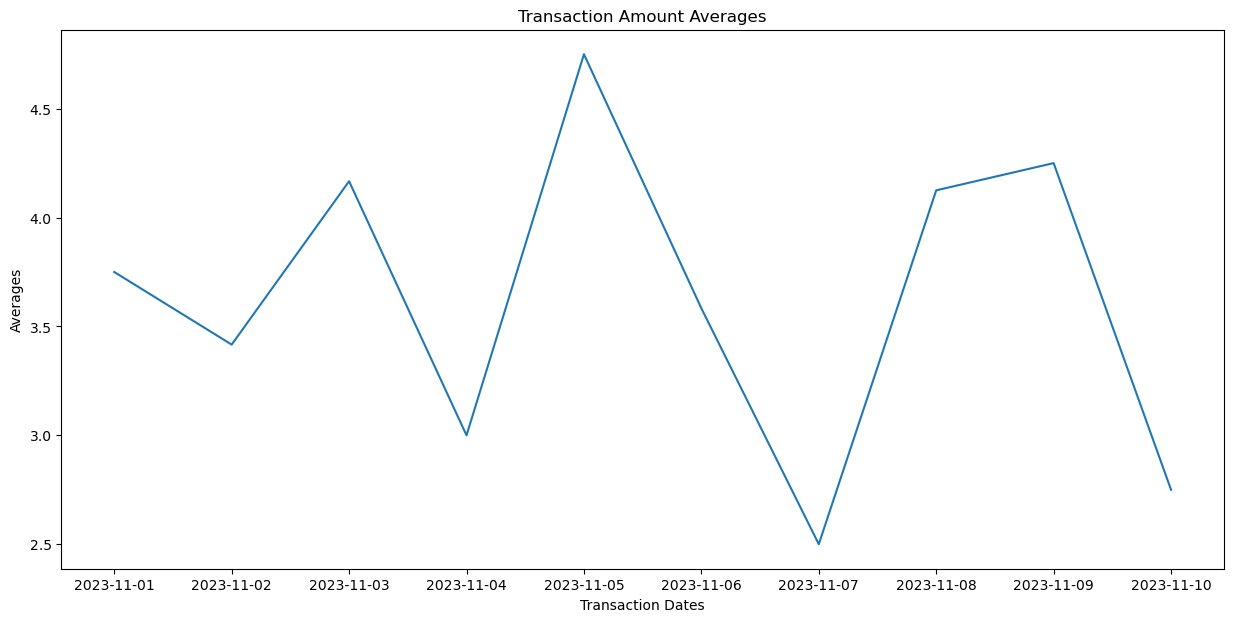

In [15]:
transaction_date_result = df.groupby(["transaction_date"]).mean(numeric_only=True)

transaction_dates = transaction_date_result.index.get_level_values(0).tolist()
amount_averages = transaction_date_result["transaction_amount"]

plt.figure(figsize=(15,7))

plt.title("Transaction Amount Averages")
plt.xlabel("Transaction Dates")
plt.ylabel("Averages")

plt.plot(transaction_dates, amount_averages)

plt.show()


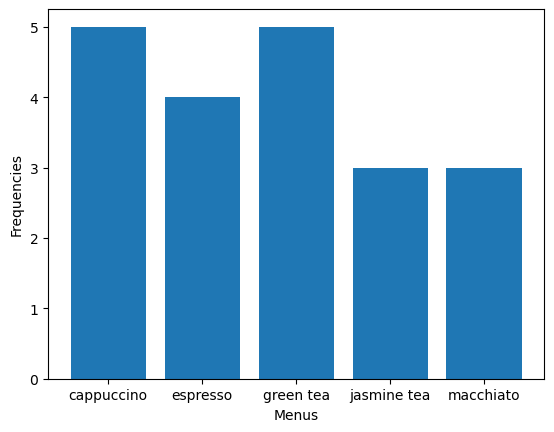

In [4]:
menu_count_result = df.groupby(["menu"]).count()

menu_counts = menu_count_result["transaction_id"]
menus = menu_count_result.index.get_level_values(0).tolist()

plt.xlabel("Menus")
plt.ylabel("Frequencies")
plt.bar(menus, menu_counts)

plt.show()

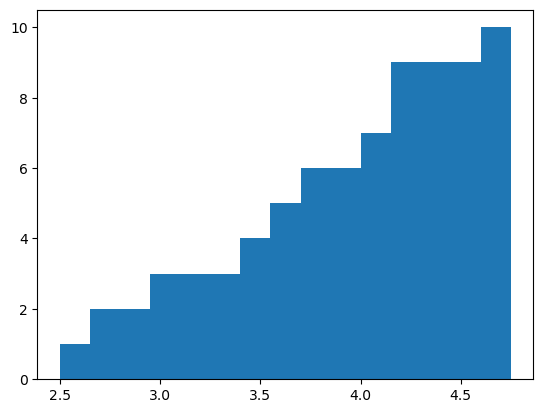

In [6]:
plt.hist(
    amount_averages,
    bins=15,
    cumulative=True,
)

plt.show()

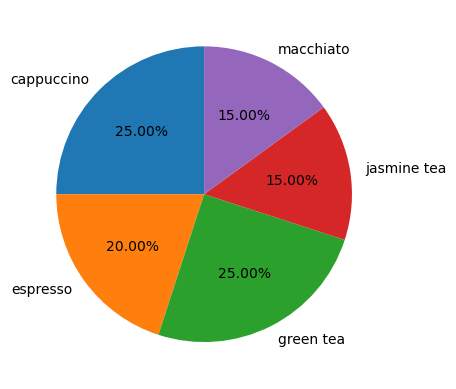

In [8]:
plt.pie(
    menu_counts,
    labels=menus,
    autopct="%.2f%%",
    startangle=90
)

plt.show()

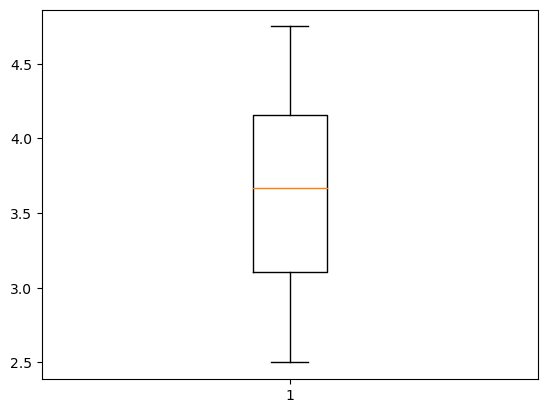

In [9]:
plt.boxplot(amount_averages)
plt.show()

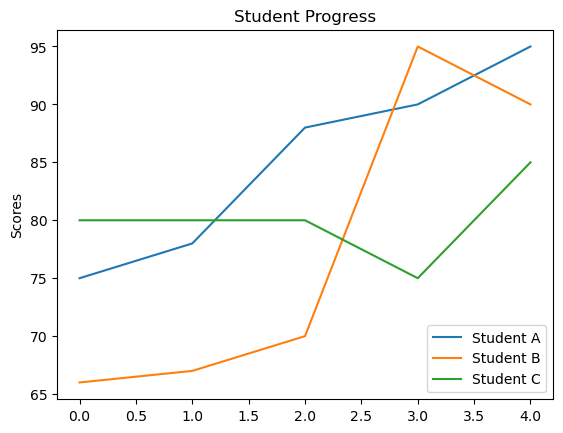

In [10]:
grades_a = [75,78,88,90,95]
grades_b = [66,67,70,95,90]
grades_c = [80,80,80,75,85]

plt.title("Student Progress")

plt.ylabel("Scores")

plt.plot(grades_a, label="Student A")
plt.plot(grades_b, label="Student B")
plt.plot(grades_c, label="Student C")

plt.legend(loc="lower right")

plt.show()

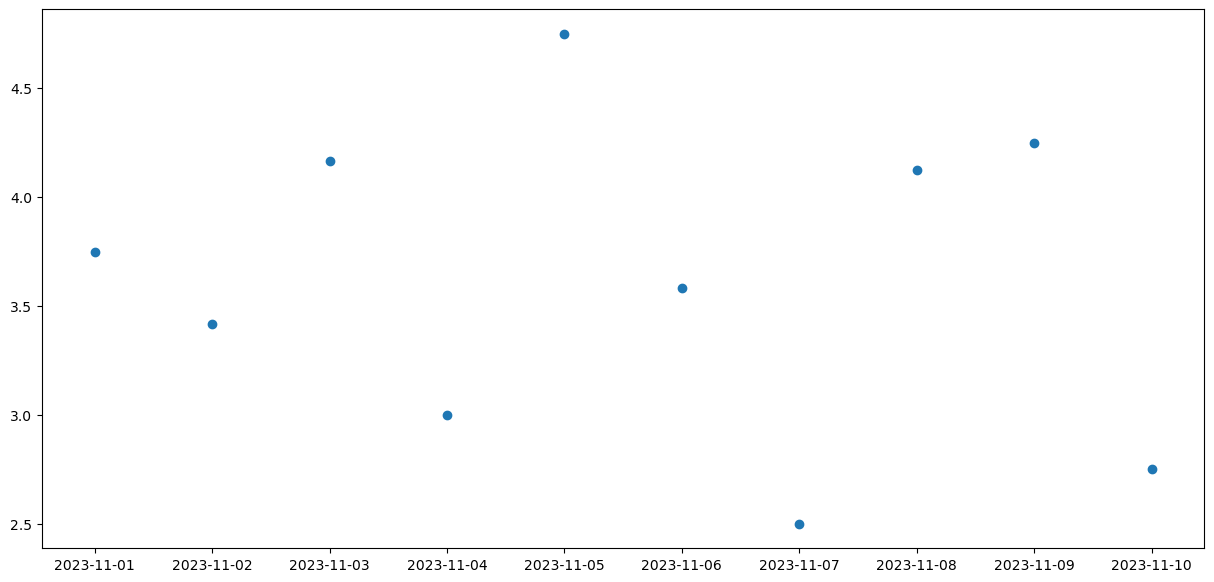

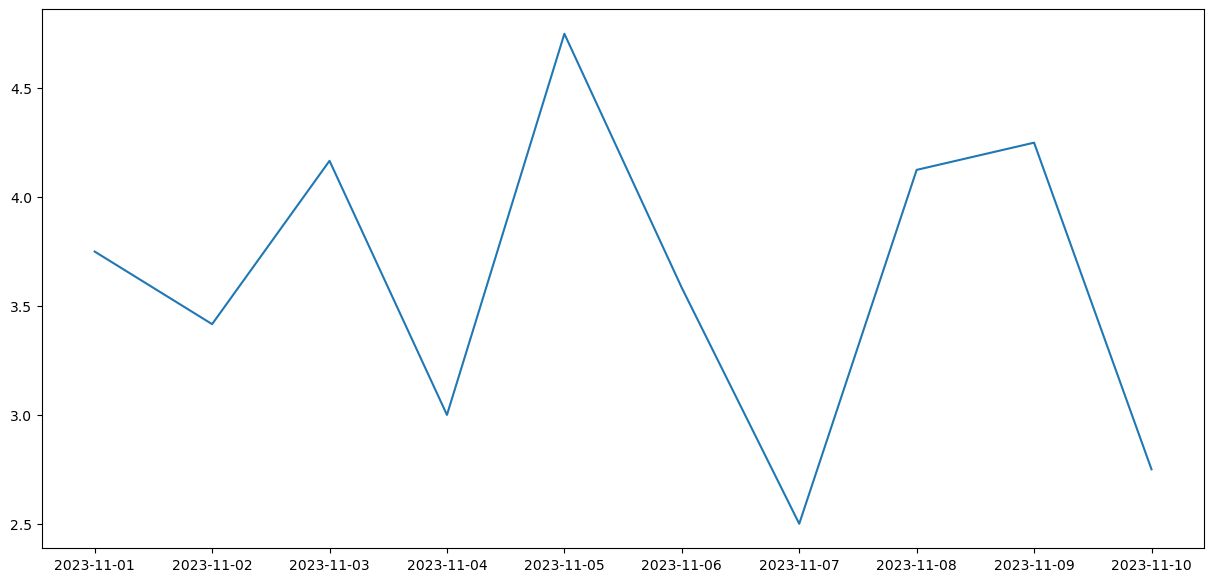

In [11]:
plt.figure(1, figsize=(15,7))
plt.scatter(transaction_dates, amount_averages)

plt.figure(2, figsize=(15, 7))
plt.plot(transaction_dates, amount_averages)

plt.show()

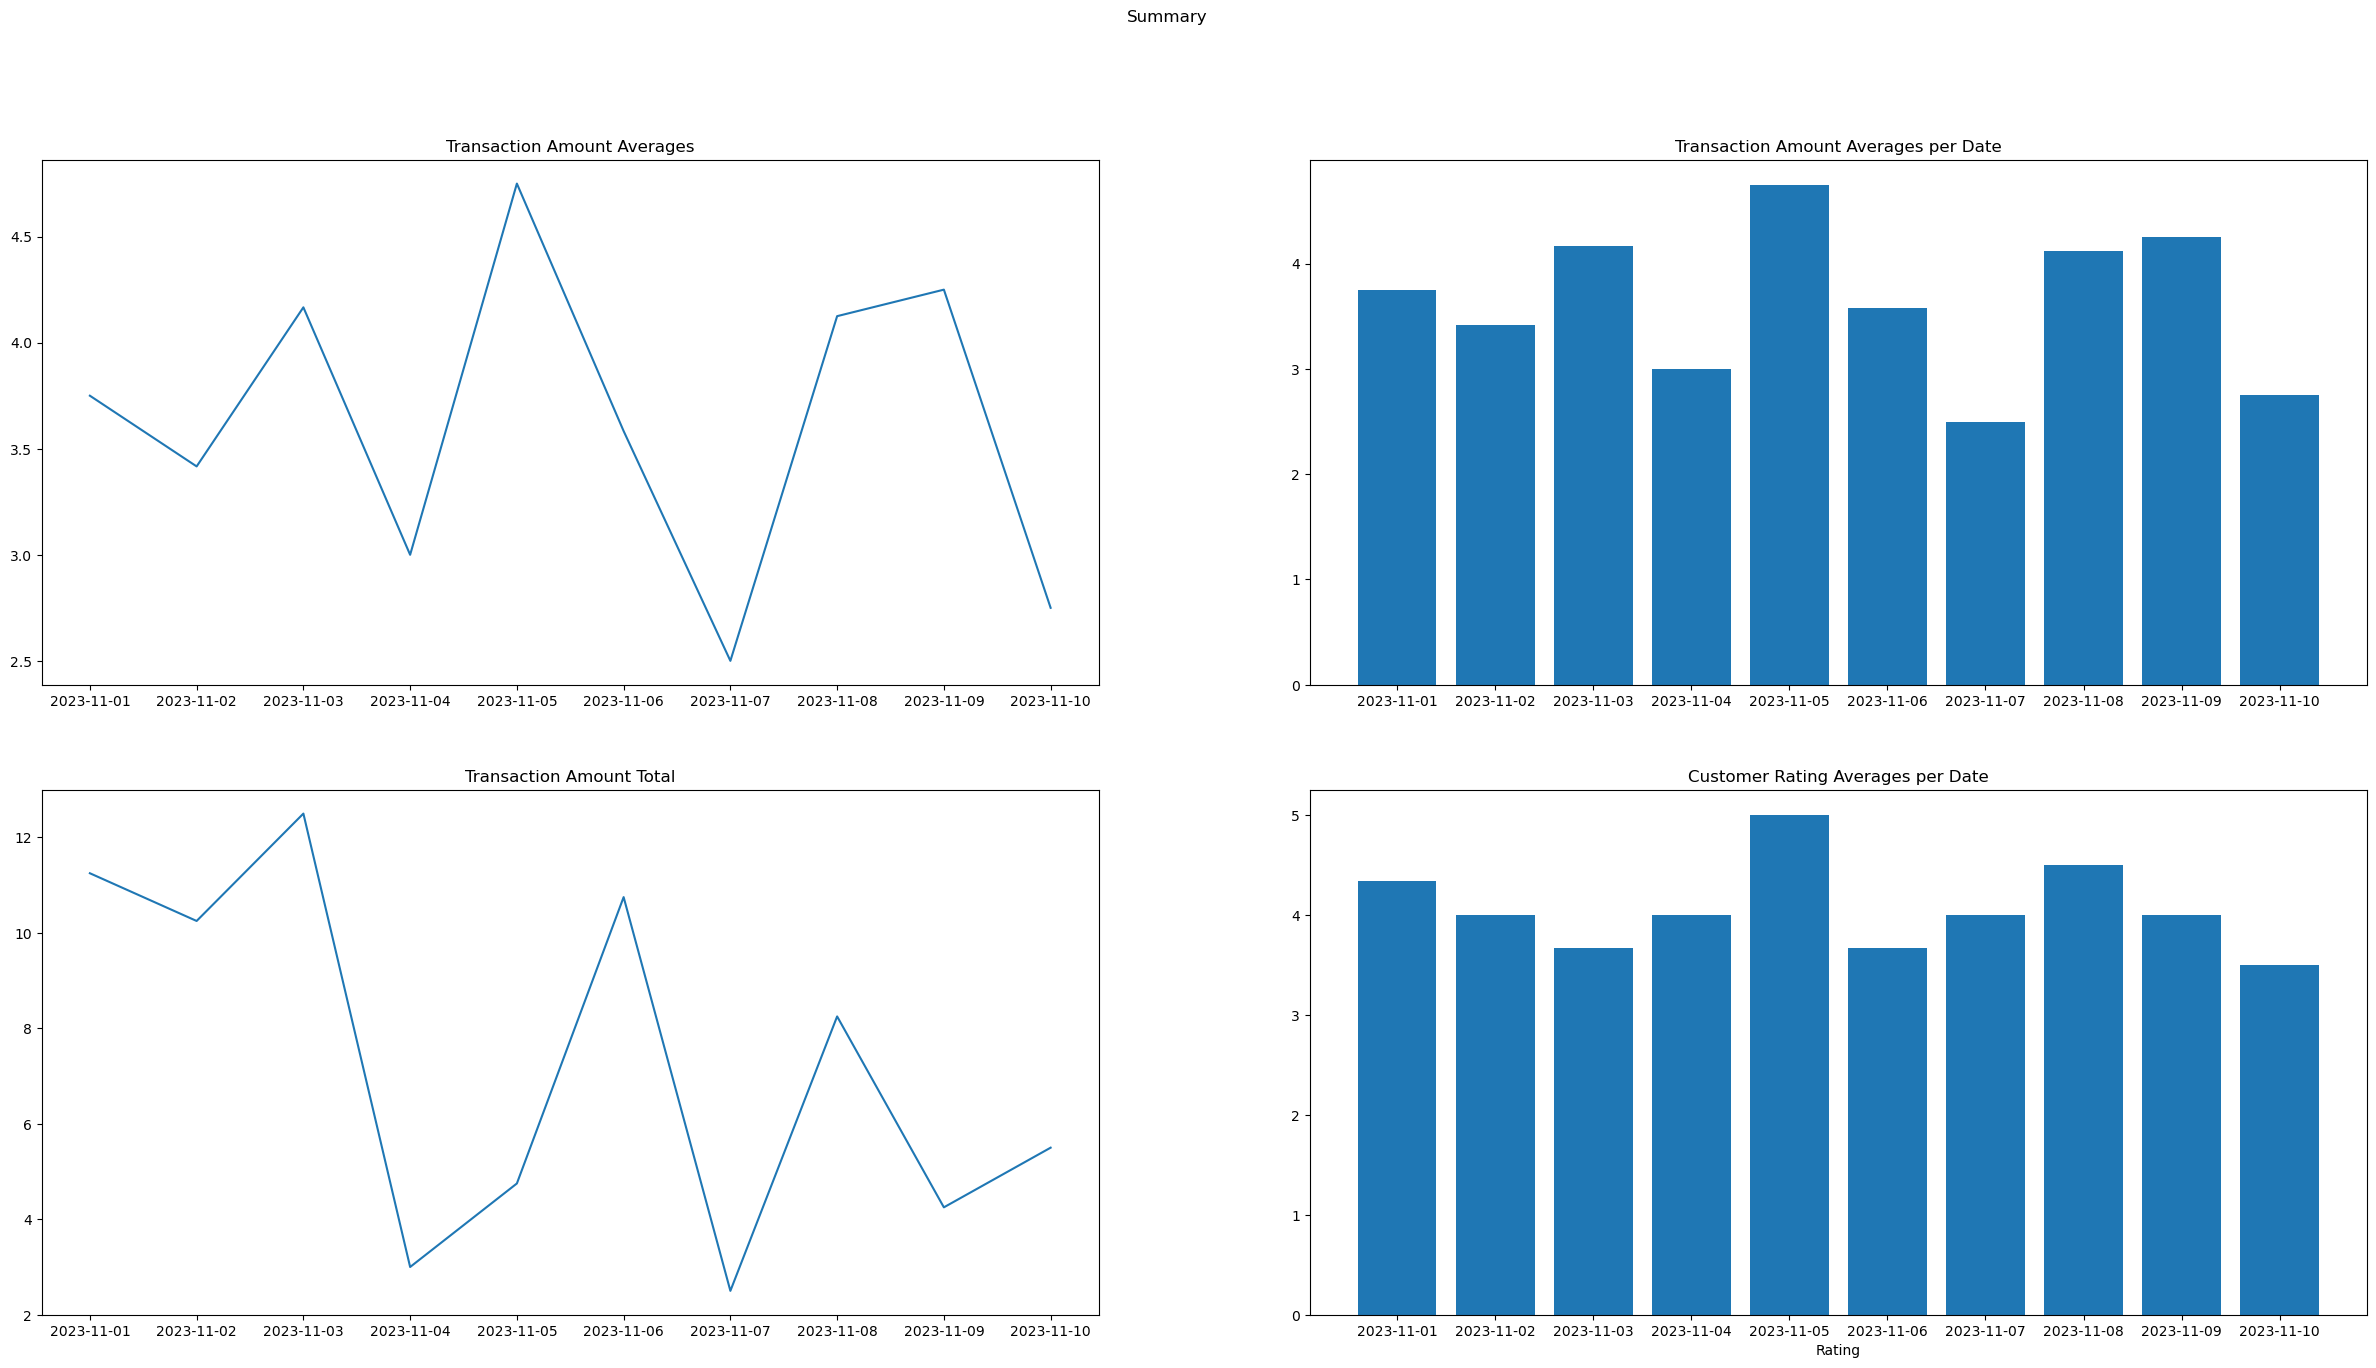

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(30, 15))

amount_sums = df.groupby(["transaction_date"]).sum(numeric_only=True)[
    "transaction_amount"
]
rating_averages = df.groupby(["transaction_date"]).mean(numeric_only=True)[
    "customer_rating"
]

axs[0, 0].plot(transaction_dates, amount_averages)
axs[0, 0].set_title("Transaction Amount Averages")

axs[0, 1].bar(transaction_dates, amount_averages)
axs[0, 1].set_title("Transaction Amount Averages per Date")

axs[1, 0].plot(transaction_dates, amount_sums)
axs[1, 0].set_title("Transaction Amount Total")

axs[1, 1].bar(transaction_dates, rating_averages)
axs[1, 1].set_title("Customer Rating Averages per Date")
axs[1, 1].set_xlabel("Rating")

fig.suptitle("Summary")

plt.show()
